# Analysis of the KNNBasic algorithm

In this notebook, we will run a basic neighborhood algorithm on the movielens dataset, dump the results, and use pandas to make some data analysis.

In [1]:
import pandas as pd
from surprise import KNNWithMeans
from surprise import Dataset                                                     
from surprise import Reader                                                      
from surprise.accuracy import rmse

In [2]:
# Forming a Dataset with training and testing
data = Dataset.load_from_folds([('/home/user/Downloads/ml-100k/u1.base', '/home/user/Downloads/ml-100k/u1.test')], Reader('ml-100k'))
    
# Using Surprise Algorithm : KNNWithmeans()
algo = KNNWithMeans()                                                       

# Predicting Value
for trainset, testset in data.folds(): 
    algo.train(trainset)                             
    predictions = algo.test(testset)
    rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9649


In [3]:
predictions

[Prediction(uid='1', iid='6', r_ui=5.0, est=3.6844934917212639, details={'was_impossible': False, 'actual_k': 20}),
 Prediction(uid='1', iid='10', r_ui=3.0, est=3.8301132636713868, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='12', r_ui=5.0, est=4.413641600901423, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='14', r_ui=5.0, est=4.1562967950115572, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='17', r_ui=3.0, est=3.504539354550821, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='20', r_ui=4.0, est=3.5198064700851215, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='23', r_ui=4.0, est=4.1524915035085233, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='24', r_ui=3.0, est=3.5141345323716786, details={'was_impossible': False, 'actual_k': 40}),
 Prediction(uid='1', iid='27', r_ui=2.0, est=3.4381911966887588, de

In [4]:
# PREDICTIONS into Dataframe 
df = pd.DataFrame(predictions, columns=['user_id', 'item_id', 'ratings_ui', 'estimated_Ratings', 'details'])    

# Adding a col Error in Dataframe
df['ERROR IN PREDICTION'] = abs(df.estimated_Ratings - df.ratings_ui)

In [5]:
df.head()

,user_id,item_id,ratings_ui,estimated_Ratings,details,ERROR IN PREDICTION
0,1,6,5.0,3.684493,"{'was_impossible': False, 'actual_k': 20}",1.315507
1,1,10,3.0,3.830113,"{'was_impossible': False, 'actual_k': 40}",0.830113
2,1,12,5.0,4.413642,"{'was_impossible': False, 'actual_k': 40}",0.586358
3,1,14,5.0,4.156297,"{'was_impossible': False, 'actual_k': 40}",0.843703
4,1,17,3.0,3.504539,"{'was_impossible': False, 'actual_k': 40}",0.504539


In [6]:
best_predictions = df.sort_values(by='ERROR IN PREDICTION')[:10]
worst_predictions = df.sort_values(by='ERROR IN PREDICTION')[-10:]

In [7]:
# Let's take a look at the best predictions of the algorithm
best_predictions

,user_id,item_id,ratings_ui,estimated_Ratings,details,ERROR IN PREDICTION
16373,330,172,5.0,5.0,"{'was_impossible': False, 'actual_k': 40}",0.0
13998,295,483,5.0,5.0,"{'was_impossible': False, 'actual_k': 40}",0.0
8008,181,1151,1.0,1.0,"{'was_impossible': False, 'actual_k': 4}",0.0
8005,181,1128,1.0,1.0,"{'was_impossible': False, 'actual_k': 9}",0.0
8003,181,1094,1.0,1.0,"{'was_impossible': False, 'actual_k': 8}",0.0
265,5,424,1.0,1.0,"{'was_impossible': False, 'actual_k': 13}",0.0
8001,181,1087,1.0,1.0,"{'was_impossible': False, 'actual_k': 9}",0.0
7993,181,1049,1.0,1.0,"{'was_impossible': False, 'actual_k': 19}",0.0
7991,181,1040,1.0,1.0,"{'was_impossible': False, 'actual_k': 19}",0.0
17369,350,174,5.0,5.0,"{'was_impossible': False, 'actual_k': 40}",0.0


It's interesting to note that these perfect predictions are actually lucky shots: $|U_i|$ is always very small, meaning that very few users have rated the target item. This implies that the set of neighbors is very small (see the ``actual_k`` field)... And, it just happens that all the ratings from the neighbors are the same (and mostly, are equal to that of the target user).

This may be a bit surprising but these lucky shots are actually very important to the accuracy of the algorithm... Try running the same algorithm with a value of ``min_k`` equal to $10$. This means that if there are less than $10$ neighbors, the prediction is set to the mean of all ratings. You'll see your accuracy decrease!

In [8]:
# Now, let's look at the prediction with the biggest error
worst_predictions

,user_id,item_id,ratings_ui,estimated_Ratings,details,ERROR IN PREDICTION
157,2,315,1.0,4.499064,"{'was_impossible': False, 'actual_k': 40}",3.499064
13972,295,183,1.0,4.551218,"{'was_impossible': False, 'actual_k': 40}",3.551218
15290,312,157,1.0,4.557994,"{'was_impossible': False, 'actual_k': 40}",3.557994
9514,212,180,1.0,4.588900,"{'was_impossible': False, 'actual_k': 40}",3.588900
9289,206,895,5.0,1.410249,"{'was_impossible': False, 'actual_k': 40}",3.589751
7861,181,25,5.0,1.306411,"{'was_impossible': False, 'actual_k': 40}",3.693589
7390,167,169,1.0,4.729330,"{'was_impossible': False, 'actual_k': 40}",3.729330
15306,312,265,1.0,4.761210,"{'was_impossible': False, 'actual_k': 40}",3.761210
15286,312,144,1.0,4.936065,"{'was_impossible': False, 'actual_k': 40}",3.936065
19140,405,575,5.0,1.000000,"{'was_impossible': False, 'actual_k': 36}",4.000000


Let's focus first on the last two predictions. Well, we can't do much about them. We should have predicted $5$, but the only available neighbor had a rating of $1$, so we were screwed. The only way to avoid this kind of errors would be to increase the ``min_k`` parameter, but it would actually worsen the accuracy (see note above).

How about the other ones? It seems that for each prediction, the users are some kind of outsiders: they rated their item with a rating of $1$ when the most of the ratings for the item where high (or inversely, rated a *bad* item with a rating of $5$). See the plot below as an illustration for the first rating.

These are situations where baseline estimates would be quite helpful, in order to deal with highly biased users (and items).

<IPython.core.display.Javascript object>


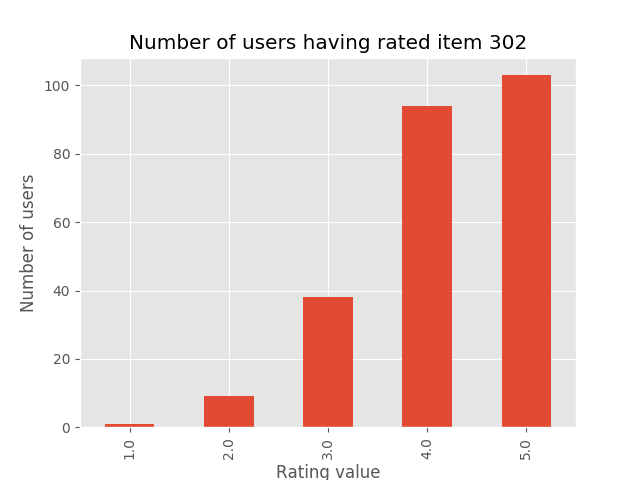

In [9]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('302')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item 302')

In [10]:
import tsne

SystemError: Parent module '' not loaded, cannot perform relative import

In [11]:
from tsne import bh_sne

SystemError: Parent module '' not loaded, cannot perform relative import